In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
df = pd.read_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/df_with_rolling_features.pkl')

In [13]:
df[df.player == 'Harry_Kane'].groupby('season')['total_points'].sum()

season
1617.0    224.0
1718.0    217.0
1819.0    160.0
1920.0    158.0
2021.0    153.0
Name: total_points, dtype: float64

<AxesSubplot:ylabel='Frequency'>

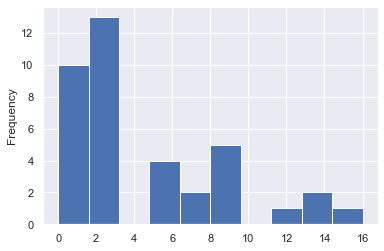

In [12]:
df[(df.player == 'Harry_Kane') & (df.season == 1920)]['total_points'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

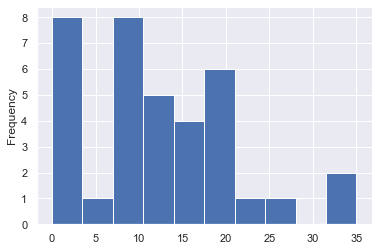

In [23]:
df[(df.player == 'Harry_Kane') & (df.season == 1920)].rolling(window = 3)['total_points'].sum().plot.hist()

In [70]:
forward_df = df.groupby(['player', 'kickoff_time'])[cols].sum().loc[::-1].rolling(window=3).sum().loc[::-1]

In [72]:
forward_df = forward_df.reset_index()

In [77]:
forward_df = df.merge(forward_df, on=['player', 'kickoff_time'], suffixes = ('', '_next_3'))

In [79]:
forward_df = forward_df.drop(columns = ['team_opponent',
 'total_points_opponent',
 'total_points_prev_opponent',
 'goals_scored_prev_opponent',
 'clean_sheets_prev_opponent',
 'goals_conceded_prev_opponent',
 'total_points_prev_2_opponent',
 'goals_scored_prev_2_opponent',
 'clean_sheets_prev_2_opponent',
 'goals_conceded_prev_2_opponent',
 'influence_prev_2_opponent',
 'creativity_prev_2_opponent',
 'threat_prev_2_opponent',
 'total_points_prev_3_opponent',
 'goals_scored_prev_3_opponent',
 'clean_sheets_prev_3_opponent',
 'goals_conceded_prev_3_opponent',
 'influence_prev_3_opponent',
 'creativity_prev_3_opponent',
 'threat_prev_3_opponent',
 'total_points_prev_4_opponent',
 'goals_scored_prev_4_opponent',
 'clean_sheets_prev_4_opponent',
 'goals_conceded_prev_4_opponent',
 'influence_prev_4_opponent',
 'creativity_prev_4_opponent',
 'threat_prev_4_opponent',
 'total_points_prev_5_opponent',
 'goals_scored_prev_5_opponent',
 'clean_sheets_prev_5_opponent',
 'goals_conceded_prev_5_opponent',
 'influence_prev_5_opponent',
 'creativity_prev_5_opponent',
 'threat_prev_5_opponent',
 'total_points_prev_6_opponent',
 'goals_scored_prev_6_opponent',
 'clean_sheets_prev_6_opponent',
 'goals_conceded_prev_6_opponent',
 'influence_prev_6_opponent',
 'creativity_prev_6_opponent',
 'threat_prev_6_opponent',
 'total_points_prev_7_opponent',
 'goals_scored_prev_7_opponent',
 'clean_sheets_prev_7_opponent',
 'goals_conceded_prev_7_opponent',
 'influence_prev_7_opponent',
 'creativity_prev_7_opponent',
 'threat_prev_7_opponent',
 'total_points_prev_8_opponent',
 'goals_scored_prev_8_opponent',
 'clean_sheets_prev_8_opponent',
 'goals_conceded_prev_8_opponent',
 'influence_prev_8_opponent',
 'creativity_prev_8_opponent',
 'threat_prev_8_opponent',
 'total_points_prev_9_opponent',
 'goals_scored_prev_9_opponent',
 'clean_sheets_prev_9_opponent',
 'goals_conceded_prev_9_opponent',
 'influence_prev_9_opponent',
 'creativity_prev_9_opponent',
 'threat_prev_9_opponent',
 'total_points_prev_10_opponent',
 'goals_scored_prev_10_opponent',
 'clean_sheets_prev_10_opponent',
 'goals_conceded_prev_10_opponent',
 'influence_prev_10_opponent',
 'creativity_prev_10_opponent',
 'threat_prev_10_opponent'])

In [81]:
list(forward_df)

['total_points',
 'player',
 'team',
 'position',
 'gw',
 'opponent_team',
 'was_home',
 'kickoff_time',
 'season',
 'minutes',
 'total_points_prev',
 'team_h_score_prev',
 'team_a_score_prev',
 'minutes_prev',
 'goals_scored_prev',
 'assists_prev',
 'clean_sheets_prev',
 'goals_conceded_prev',
 'bonus_prev',
 'bps_prev',
 'influence_prev',
 'creativity_prev',
 'threat_prev',
 'ict_index_prev',
 'transfers_balance_prev',
 'selected_prev',
 'transfers_in_prev',
 'transfers_out_prev',
 'total_points_prev_2',
 'team_h_score_prev_2',
 'team_a_score_prev_2',
 'minutes_prev_2',
 'goals_scored_prev_2',
 'assists_prev_2',
 'clean_sheets_prev_2',
 'goals_conceded_prev_2',
 'bonus_prev_2',
 'bps_prev_2',
 'influence_prev_2',
 'creativity_prev_2',
 'threat_prev_2',
 'ict_index_prev_2',
 'transfers_balance_prev_2',
 'selected_prev_2',
 'transfers_in_prev_2',
 'transfers_out_prev_2',
 'total_points_prev_3',
 'team_h_score_prev_3',
 'team_a_score_prev_3',
 'minutes_prev_3',
 'goals_scored_prev_3',
 

In [88]:
forward_df.to_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/forward_rolling_df.pkl')